In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 12345
algorithm_globals.random_seed = seed

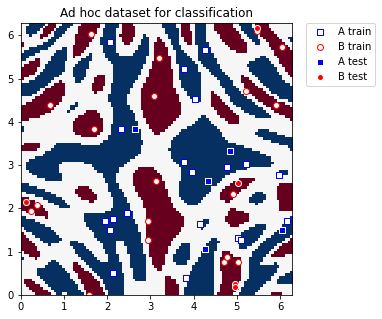

In [4]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 0), 0],
    test_features[np.where(test_labels[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 1), 0],
    test_features[np.where(test_labels[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")

plt.show()

In [5]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

In [6]:
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(train_features, train_labels)
adhoc_score = adhoc_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score: {adhoc_score}")

Callable kernel classification test score: 1.0


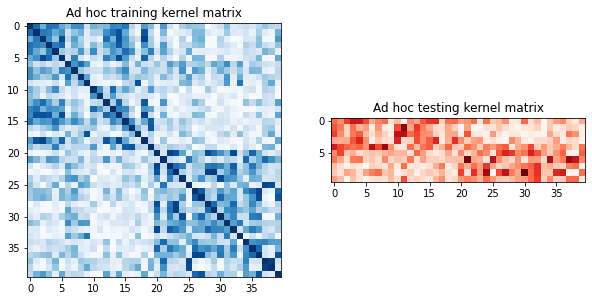

Precomputed kernel classification test score: 1.0


In [7]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")
plt.show()

adhoc_svc = SVC(kernel="precomputed")
adhoc_svc.fit(adhoc_matrix_train, train_labels)
adhoc_score = adhoc_svc.score(adhoc_matrix_test, test_labels)

print(f"Precomputed kernel classification test score: {adhoc_score}")

In [8]:
qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 1.0


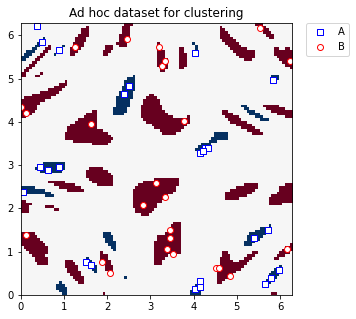

In [9]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=25,
    test_size=0,
    n=adhoc_dimension,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)
plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for clustering")

plt.show()

In [10]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

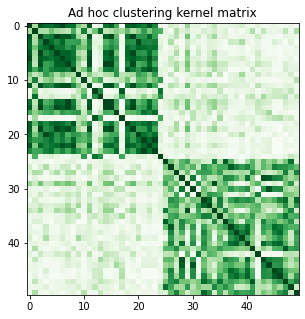

Clustering score: 0.7287008798015754


In [11]:
adhoc_matrix = adhoc_kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score}")

In [12]:
from cvxopt import matrix, solvers
M = adhoc_matrix.shape[0]
P = matrix(adhoc_matrix)
q = matrix(np.zeros(M))
G = matrix(-np.eye(M))
h = matrix(np.zeros(M))
A = matrix(np.ones(M), (1, M))
b = matrix(1.0)

sol = solvers.qp(P, q, G, h, A, b)
alpha = sol['x']
dval = 2*sol['dual objective']

R2 = 1-dval

sv_ind = np.isclose(np.asarray(1-2*alpha.H*P + dval)[0], R2)
def radious2(x):
    return np.asarray(1-2*matrix(np.asarray(alpha)[sv_ind]).H*matrix(adhoc_kernel.evaluate(train_features[sv_ind], x))+dval)[0]

     pcost       dcost       gap    pres   dres
 0:  1.3674e-01 -8.9917e-01  5e+01  7e+00  8e+00
 1:  1.5006e-01 -8.5047e-01  1e+00  1e-15  2e-15
 2:  1.4785e-01  6.8335e-02  8e-02  1e-16  2e-15
 3:  1.3764e-01  1.1717e-01  2e-02  4e-16  4e-16
 4:  1.3306e-01  1.2794e-01  5e-03  2e-16  3e-16
 5:  1.3105e-01  1.2974e-01  1e-03  7e-17  3e-16
 6:  1.3042e-01  1.3033e-01  1e-04  1e-16  3e-16
 7:  1.3036e-01  1.3036e-01  3e-06  8e-17  3e-16
 8:  1.3036e-01  1.3036e-01  3e-08  3e-16  3e-16
Optimal solution found.


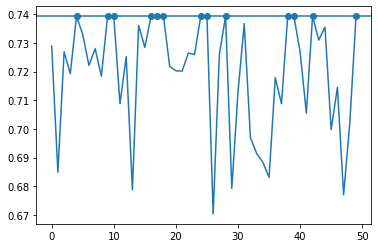

In [13]:
plt.plot(np.asarray(1-2*alpha.H*P + dval)[0])
plt.axhline(y=R2, xmin=0, xmax=M-1)
plt.scatter(np.where(sv_ind), np.asarray(1-2*alpha.H*P + dval)[0][sv_ind])

In [14]:
A = np.empty_like(adhoc_matrix)
from itertools import product
from tqdm.notebook import tqdm
for i, j in tqdm(list(product(range(M), range(M)))):
    if i==j:
        A[i, j]=1
    elif i>j:
        tX = np.asanyarray([t*train_features[i]+(1-t)*train_features[j] for t in np.linspace(0, 1, 20)])
        ind = radious2(tX)
        if np.any(ind>R2):
            A[i, j]=0
            A[j, i]=0
        else:
            A[i, j]=1
            A[j, i]=1
    else:
        pass

  0%|          | 0/2500 [00:00<?, ?it/s]

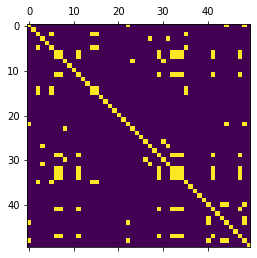

In [15]:
plt.matshow(A)

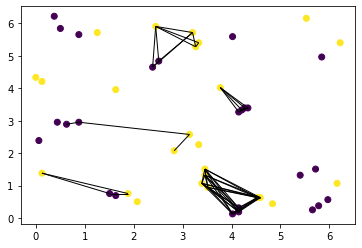

In [16]:
import networkx as nx 
G = nx.from_numpy_matrix(A)
positions = dict(zip(G.nodes, train_features[:, :2]))

ax = plt.subplot(1, 1, 1)
ax.scatter(train_features[:, 0], train_features[:, 1], c=train_labels)
nx.draw_networkx_edges(G, positions, ax=ax)

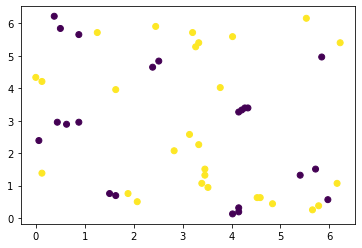

In [18]:
ax = plt.subplot(1, 1, 1)
ax.scatter(train_features[:, 0], train_features[:, 1], c=cluster_labels)